In [14]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.9.1
2.9.0


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [16]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('https://raw.githubusercontent.com/przem85/podstawy_sztucznej_inteligencji/main/Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('https://raw.githubusercontent.com/przem85/podstawy_sztucznej_inteligencji/main/Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


/tmp/ipykernel_12488/2985883500.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('https://raw.githubusercontent.com/przem85/podstawy_sztucznej_inteligencji/main/Dane/adult/adult.data', sep=", ",header = None)
/tmp/ipykernel_12488/2985883500.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv('https://raw.githubusercontent.com/przem85/podstawy_sztucznej_inteligencji/main/Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [17]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


# Zad
Nauczmy model z BatchNormalization

Pamiętaj, że 

* BatchNormalization powinno być dodane przed funkcją aktywacji
* ustaw parametr use_bias=False

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Activation

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100, use_bias=False,input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(50, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(10, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4100      
                                                                 
 batch_normalization_3 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 50)                5000      
                                                                 
 batch_normalization_4 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 50)               

In [19]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [20]:
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100)

Epoch 1/100
943/943 [==============================] - 6s 5ms/step - loss: 0.4720 - accuracy: 0.7717 - val_loss: 0.5062 - val_accuracy: 0.7622
Epoch 2/100
943/943 [==============================] - 4s 5ms/step - loss: 0.3817 - accuracy: 0.8189 - val_loss: 0.5153 - val_accuracy: 0.7617
Epoch 3/100
943/943 [==============================] - 4s 4ms/step - loss: 0.3755 - accuracy: 0.8186 - val_loss: 0.4613 - val_accuracy: 0.7957
Epoch 4/100
943/943 [==============================] - 3s 4ms/step - loss: 0.3700 - accuracy: 0.8220 - val_loss: 0.4628 - val_accuracy: 0.7833
Epoch 5/100
943/943 [==============================] - 3s 4ms/step - loss: 0.3618 - accuracy: 0.8271 - val_loss: 0.4862 - val_accuracy: 0.7597
Epoch 6/100
943/943 [==============================] - 3s 4ms/step - loss: 0.3646 - accuracy: 0.8262 - val_loss: 0.4782 - val_accuracy: 0.7622
Epoch 7/100
943/943 [==============================] - 3s 4ms/step - loss: 0.3591 - accuracy: 0.8280 - val_loss: 0.4698 - val_accuracy: 0.7958

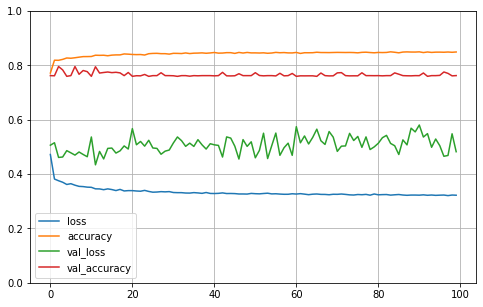

In [21]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [22]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 1s 2ms/step - loss: 0.4823 - accuracy: 0.7624


[0.4822661876678467, 0.7623506188392639]

In [23]:
from sklearn import  metrics
#metrics.accuracy_score(y_true= y_test, y_pred= model.predict_classes(X_test) )

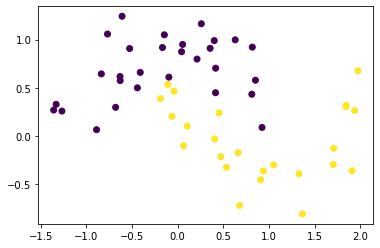

In [24]:
from sklearn.datasets import make_moons
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=5)
# split into train and test
# n_train = 30
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=2)

n_train=53
X_train, X_test = X[:n_train, :], X[n_train:, :]
y_train, y_test = y[:n_train], y[n_train:]

plt.scatter(X_train[:,0],X_train[:,1], c=y_train)
plt.show()

In [25]:
history_Adam = History()
model = Sequential()
model.add(Dense(1000,activation="relu",input_shape=(X_train.shape[1],)))
model.add(Dense(500))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(200))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(1,activation='sigmoid'))
model.summary()

model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=1000, callbacks=[history_Adam])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1000)              3000      
                                                                 
 dense_9 (Dense)             (None, 500)               500500    
                                                                 
 batch_normalization_6 (Batc  (None, 500)              2000      
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 500)               0         
                                                                 
 dense_10 (Dense)            (None, 200)               100200    
                                                                 
 batch_normalization_7 (Batc  (None, 200)              800       
 hNormalization)                                      

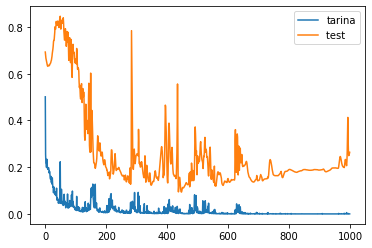

In [26]:
plt.plot(history_Adam.history['loss'], label = "tarina")
plt.plot(history_Adam.history['val_loss'], label = "test ")


plt.legend()
plt.show()

3888/3888 [==============================] - 10s 3ms/step


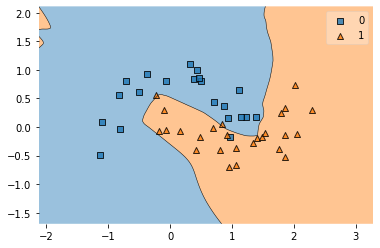

In [27]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test, y_test, model)
plt.show()

In [28]:
history_Adam = History()
model = Sequential()
model.add(Dense(1000,activation="relu",input_shape=(X_train.shape[1],)))
model.add(Dense(500))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(200))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(1,activation='sigmoid'))
model.summary()

model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=1000, callbacks=[history_Adam])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1000)              3000      
                                                                 
 dense_13 (Dense)            (None, 500)               500500    
                                                                 
 batch_normalization_8 (Batc  (None, 500)              2000      
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 500)               0         
                                                                 
 dense_14 (Dense)            (None, 200)               100200    
                                                                 
 batch_normalization_9 (Batc  (None, 200)              800       
 hNormalization)                                      

In [29]:
from mlxtend.plotting import plot_decision_regions

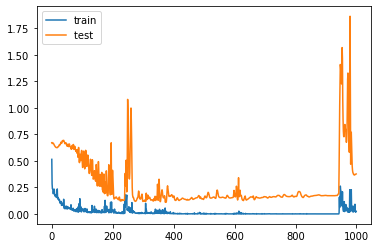

In [30]:
plt.plot(history_Adam.history['loss'], label = "train")
plt.plot(history_Adam.history['val_loss'], label = "test ")


plt.legend()
plt.show()

3888/3888 [==============================] - 13s 3ms/step


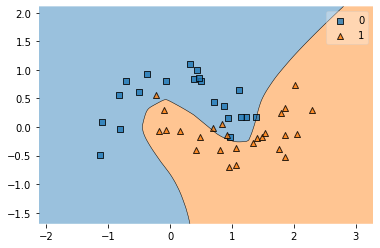

In [31]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test, y_test, model)
plt.show()